In [1]:
import  gymnasium as gym
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy
from tqdm import tqdm
from memory import RandomReplayMemory, PrioritizedReplayMemory
from gridWorldEnv import GridWorldEnv
from train import Agent
from pathos.multiprocessing import ProcessingPool as Pool
import matplotlib.pyplot as plt

pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


c:\Users\navid\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [2]:
def env_changes(env, ep_num):
    # if ep_num in [298, 598, 898]: #[20, 100, 250, 300, 301, 302, 310, 400, 500, 690, 700, 701, 702, 703, 710, 900, 998]:
    #     env.render_mode= "human"
    # else:
    #     env.render_mode=None

    if ep_num == 0:
        env.switch_doors(top_door="open",bottom_door="close")
        print("door_changed")
    elif ep_num == 300:
        env.switch_doors(top_door="close",bottom_door="open")
        print("door_changed")
    elif ep_num == 700:
        env.switch_doors(top_door="open",bottom_door="close")
        print("door_changed")

def parallelied_run(params):
    from train import Agent
    agent = Agent(**params)
    return agent.train()

In [3]:
parameters_random = {
        "gamma": 0.99,
        "lr": 5e-4,
        "TAU": 0.01,
        "episode_num": 1000,
        "batch_size": 64,
        "epsilon_max": 0.4,
        "epsilon_min": 0.2,
        "device": "cpu",
        "max_episode_len": 200,
        "non_stationarity": True,
        "env_changes": env_changes,
        "env_name": "GridWorldEnv",
        "stochasticity_constant": 0,
        "device": "cpu",
        "buffer_type": "random",
        "buffer_size": 200_000,
        }

parameters_random_parallel = [parameters_random for _ in range(20)]

# with Pool() as p:
#     return_data = p.map(parallelied_run, parameters_random)

# return_data_np = np.array(return_data)
# np.save("experiment_3_v1_random",return_data_np)


In [4]:
parameters_prioritized = {
        "gamma": 0.99,
        "lr": 5e-4,
        "TAU": 0.01,
        "episode_num": 1000,
        "batch_size": 64,
        "epsilon_max": 0.4,
        "epsilon_min": 0.2,
        "device": "cpu",
        "max_episode_len": 200,
        "non_stationarity": True,
        "env_changes": env_changes,
        "stochasticity_constant": 0,
        "env_name": "GridWorldEnv",
        "stochasticity_constant": 0,
        "buffer_type": "prioritized",
        "buffer_size": 200_000,
        "buffer_alpha": 0.6,
        "buffer_beta": 0.5,
        }


parameters_prioritized_parallel = [parameters_prioritized for _ in range(20)]

# with Pool() as p:
#     return_data_prioritized = p.map(parallelied_run, parameters_prioritized_parallel)

# return_data_np_prioritized = np.array(return_data_prioritized)
# np.save("experiment_3_v1_prioritized",return_data_np_prioritized)

In [13]:
#run both

parameters_parallel = [parameters_random for _ in range(35)] + [parameters_prioritized for _ in range(35)]

with Pool() as p:
    return_data = p.map(parallelied_run, parameters_parallel)

return_data_np = np.array(return_data)
np.save("experiment_3_v1_both_part2",return_data_np)

In [5]:
return_data_np = np.load("experiment_data/experiment 3 data/experiment_3_both_final.npy")

In [6]:
return_data_np.shape

(100, 3, 1000)

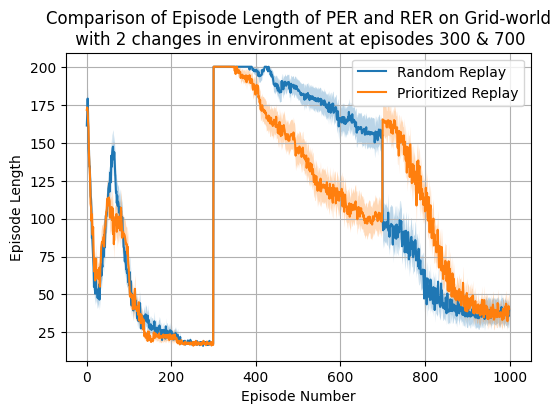

In [11]:
num_runs = 50
num_episodes = 1000

algorithm1_rewards = return_data_np[0:num_runs,0]
algorithm2_rewards = return_data_np[num_runs:2*num_runs,0]

# Calculate average rewards for each episode
avg_algorithm1_rewards = np.mean(algorithm1_rewards, axis=0)
avg_algorithm2_rewards = np.mean(algorithm2_rewards, axis=0)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(np.mean(algorithm1_rewards, axis=0), label='Random Replay')
std_err = np.std(algorithm1_rewards, axis=0) / np.sqrt(np.size(algorithm1_rewards, axis=0))
lower_std = np.mean(algorithm1_rewards,axis=0) - std_err
upper_std = np.mean(algorithm1_rewards,axis=0) + std_err
plt.fill_between(range(1, num_episodes + 1), lower_std, upper_std, alpha=0.3)

plt.plot(np.mean(algorithm2_rewards, axis=0), label='Prioritized Replay')
std_err = np.std(algorithm2_rewards, axis=0) / np.sqrt(np.size(algorithm2_rewards, axis=0))
lower_std = np.mean(algorithm2_rewards,axis=0) - std_err
upper_std = np.mean(algorithm2_rewards,axis=0) + std_err
plt.fill_between(range(1, num_episodes + 1), lower_std, upper_std, alpha=0.3)

plt.xlabel('Episode Number')
plt.ylabel('Episode Length')
plt.title('Comparison of Episode Length of PER and RER on Grid-world\n with 2 changes in environment at episodes 300 & 700')
plt.legend()
plt.grid(True)
plt.show()

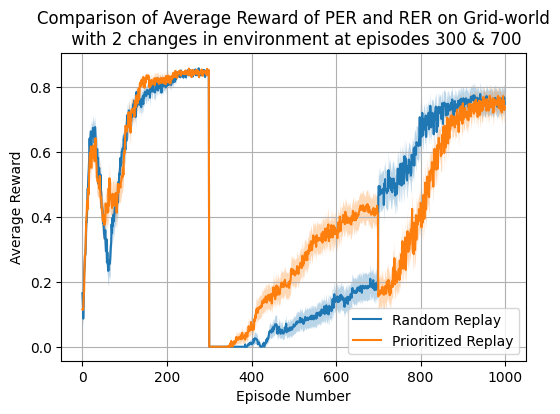

In [10]:
num_runs = 50
num_episodes = 1000

algorithm1_rewards = return_data_np[0:num_runs,2]
algorithm2_rewards = return_data_np[num_runs:2*num_runs,2]

# Calculate average rewards for each episode
avg_algorithm1_rewards = np.mean(algorithm1_rewards, axis=0)
avg_algorithm2_rewards = np.mean(algorithm2_rewards, axis=0)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(np.mean(algorithm1_rewards, axis=0), label='Random Replay')
std_err = np.std(algorithm1_rewards, axis=0) / np.sqrt(np.size(algorithm1_rewards, axis=0))
lower_std = np.mean(algorithm1_rewards,axis=0) - std_err
upper_std = np.mean(algorithm1_rewards,axis=0) + std_err
plt.fill_between(range(1, num_episodes + 1), lower_std, upper_std, alpha=0.3)

plt.plot(np.mean(algorithm2_rewards, axis=0), label='Prioritized Replay')
std_err = np.std(algorithm2_rewards, axis=0) / np.sqrt(np.size(algorithm2_rewards, axis=0))
lower_std = np.mean(algorithm2_rewards,axis=0) - std_err
upper_std = np.mean(algorithm2_rewards,axis=0) + std_err
plt.fill_between(range(1, num_episodes + 1), lower_std, upper_std, alpha=0.3)

plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Comparison of Average Reward of PER and RER on Grid-world\n with 2 changes in environment at episodes 300 & 700')
plt.legend()
plt.grid(True)
plt.show()

### Average of last 10 episodes at differnet episode numbers:

In [5]:
num_runs = 50
num_episodes = 1000

algorithm1_rewards = return_data_np[0:num_runs,0]
algorithm2_rewards = return_data_np[num_runs:2*num_runs,0]

# Calculate average rewards for each episode
avg_random_rewards = np.mean(algorithm1_rewards, axis=0)
avg_prioritized_rewards = np.mean(algorithm2_rewards, axis=0)

print("Experiment 3:")
indx = [200, 299, 600, 699, 800, 999]
for ind in indx:
    print(f"RER (at ep={ind}):", round(np.mean(avg_random_rewards[(ind-10):ind]),2))
    print(f"PER: (at ep={ind}):", round(np.mean(avg_prioritized_rewards[(ind-10):ind]),2))

Experiment 3:
RER (at ep=200): 24.7
PER: (at ep=200): 22.27
RER (at ep=299): 17.97
PER: (at ep=299): 17.67
RER (at ep=600): 166.61
PER: (at ep=600): 115.77
RER (at ep=699): 156.27
PER: (at ep=699): 101.11
RER (at ep=800): 62.38
PER: (at ep=800): 115.73
RER (at ep=999): 37.37
PER: (at ep=999): 38.99
